<a href="https://colab.research.google.com/github/uol-mediaprocessing/group-projects-hand-gesture/blob/master/main_Hand_Gestures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group C: Hand Gesture Recognition

## Members

Niklas Holtz, Master Informatik.  
Joshua Falk, Bachelor Informatik.  
Julien Räker, Bachelor Informatik.


## What is gesture recognition?

It's a topic in computer science with the goal of interpreting human gestures via mathematical algorithms. Hand gestures recognition as an typical form of the recognition is used to control or interact with devices without physically touching them. There are several ways to do this, but we focus on processing images and videos using deep learning.


Some typical hand gestures are:
![Some typical hand gestures.](https://www.fibaro.com/en/wp-content/uploads/sites/3/2017/02/gestures.jpg)


## Our Goals/Milestones

1. Can distinguish hand from background.
2. Detect the position of the fingers.
3. Detect twisted hands (static gestures).
4. Detection of patterns/gestures.
5. Assign actions to recognized gestures.
6. Detect static getures from live images.
7. Recognize moving gestures from streams of iamges.



 ## Camera Capturing

To capture the webcam we use an asynchronous javascript function, which allows us to connect to the webcam of the user. 

<IPython.core.display.Javascript object>

Saved to photo.jpg


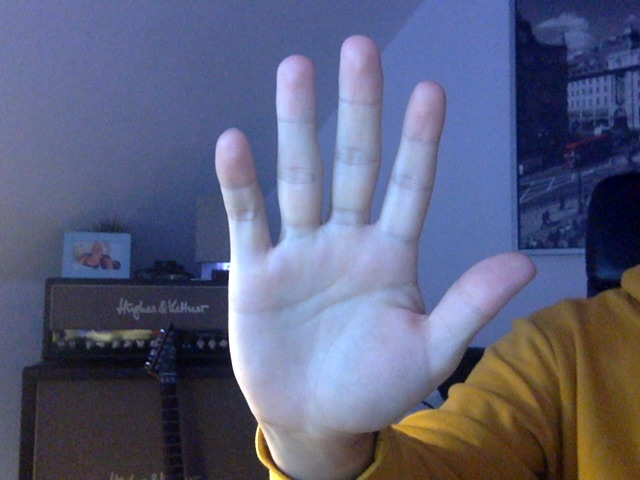

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

""" Creates a canvas element and a button to capture a photo.
:param filename: str with and ending like .jpg or .png
:param quality: a float between 0 (worst) and 1 (best) quality.
"""
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      // Create a button to capture a photo.
      const capture = document.createElement('button');
      capture.textContent = 'Capture Photo';
      div.appendChild(capture);

      //Create a video element, which captures the webcam.
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      //Append everything and start the stream.
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);
      
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))